<a href="https://colab.research.google.com/github/dharalakshmi/Iris-Flower-Classification/blob/main/Iris%20Flower%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Load Dataset
df = pd.read_csv("/mnt/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


In [6]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 3


In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [9]:
# Dataset Columns
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [17]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in sepal_length is 35
No. of unique values in sepal_width is 23
No. of unique values in petal_length is 43
No. of unique values in petal_width is 22
No. of unique values in species is 3


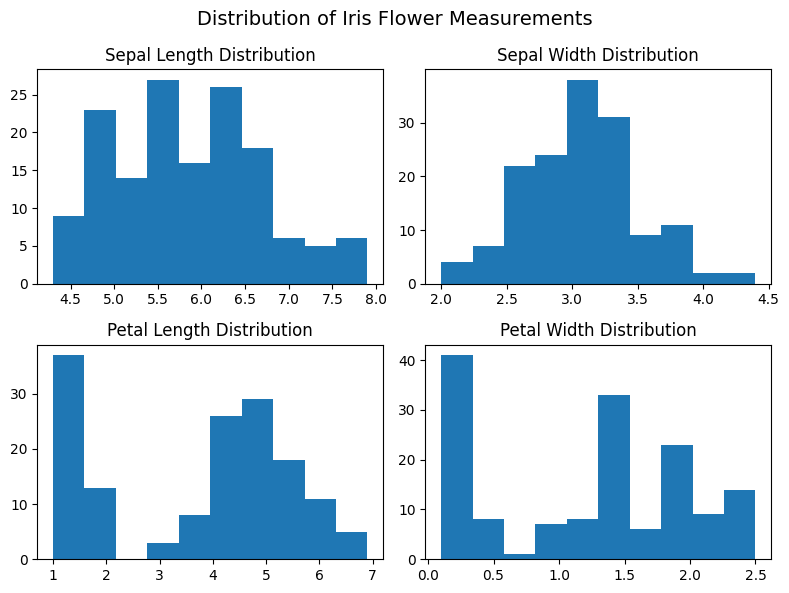

In [21]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(df['sepal_length'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(df['sepal_width'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(df['petal_length'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(df['petal_width'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

In [22]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

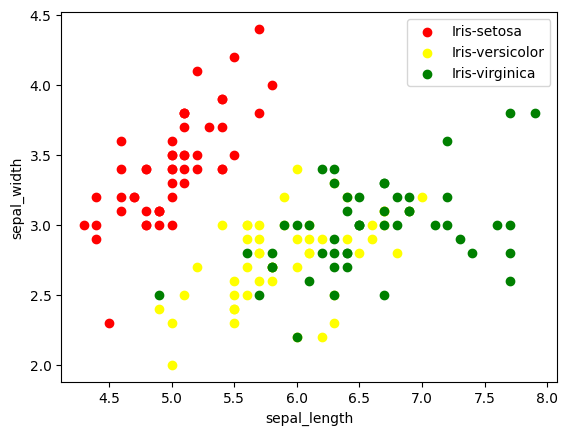

In [26]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

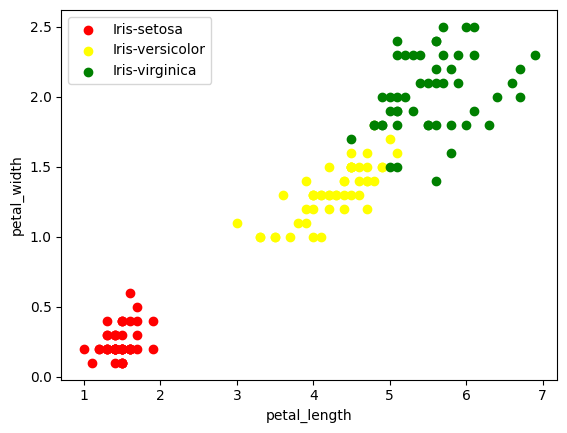

In [27]:
# Chart - 3 Scatter plot visualization code for Petal Length vs Petal Width.
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('petal_length')
plt.ylabel('petal_width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

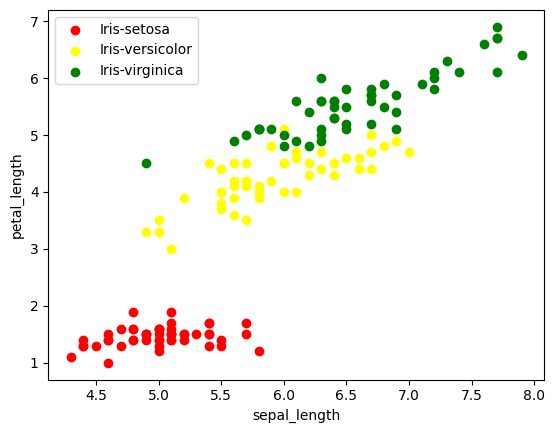

In [28]:
# Chart - 4 Scatter plot visualization code for Sepal Length vs Petal Length.
# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('sepal_length')
plt.ylabel('petal_length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

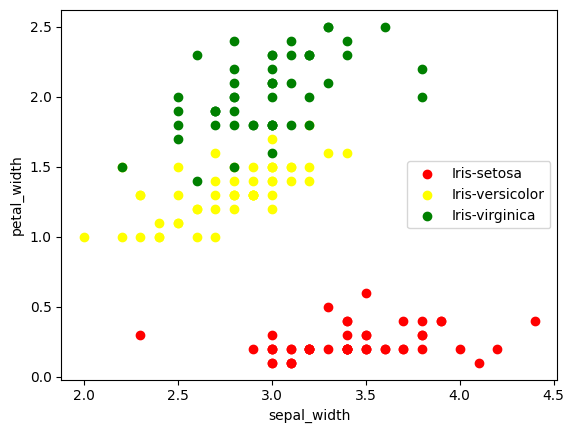

In [30]:
# Chart - 5 Scatter plot visualization code for Sepal Width vs Petal Width.
# Create a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('sepal_width')
plt.ylabel('petal_width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

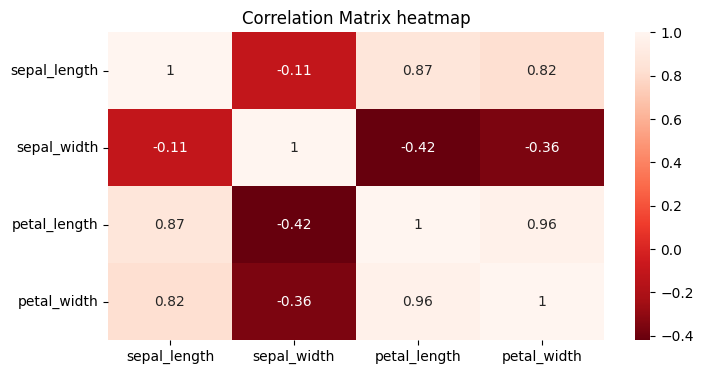

In [32]:
# Correlation Heatmap Visualization Code
# Calculate the correlation matrix, excluding non-numeric columns
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

In [34]:
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
df['species'] = le.fit_transform(df['species'])

# Check the unique values in the 'Species' column after encoding
unique_species = df['species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


In [36]:
# Defining the X and y
x=df.drop(columns=['species'], axis=1)
y=df['species']

In [37]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [38]:
# Checking the train distribution of dependent variable
y_train.value_counts()

,count
species,
0,39
1,35
2,31


In [41]:
def evaluate_model(model, x_train, x_test, y_train, y_test):

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [42]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

In [43]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


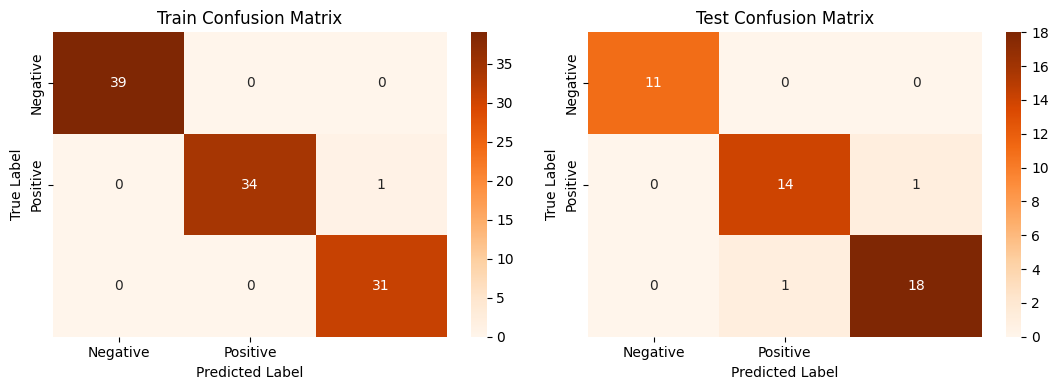


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    1        | 0.971429 |   0.985507 |  35        |
| 2            |    0.96875  | 1        |   0.984127 |  31        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989583 | 0.990476 |   0.989878 | 105        |
| weighted avg |    0.990774 | 0.990476 |   0.990483 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.947368 | 0.947368 |   0.947368 | 19        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [44]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [45]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.990774
Precision Test,0.955556
Recall Train,0.990476
Recall Test,0.955556
Accuracy Train,0.990476
Accuracy Test,0.955556
F1 macro Train,0.990483
F1 macro Test,0.955556


In [46]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 100, 'penalty': 'l2', 'solver': 'sag'}


In [47]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


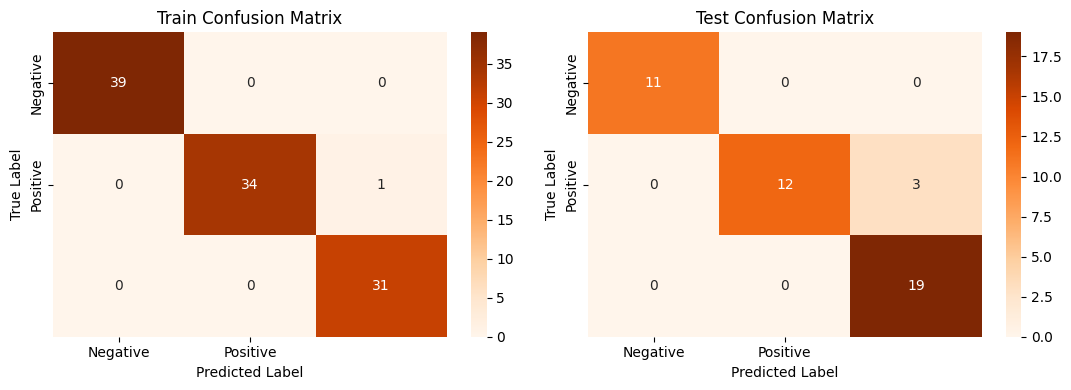


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    1        | 0.971429 |   0.985507 |  35        |
| 2            |    0.96875  | 1        |   0.984127 |  31        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989583 | 0.990476 |   0.989878 | 105        |
| weighted avg |    0.990774 | 0.990476 |   0.990483 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    1        | 0.8      |   0.888889 | 15        |
| 2            |    0.863636 | 1        |   0.926829 | 19        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [48]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [49]:
score['Logistic regression tuned'] = lr_score2

In [50]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned
Precision Train,0.990774,0.990774
Precision Test,0.955556,0.942424
Recall Train,0.990476,0.990476
Recall Test,0.955556,0.933333
Accuracy Train,0.990476,0.990476
Accuracy Test,0.955556,0.933333
F1 macro Train,0.990483,0.990483
F1 macro Test,0.955556,0.932069


In [51]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


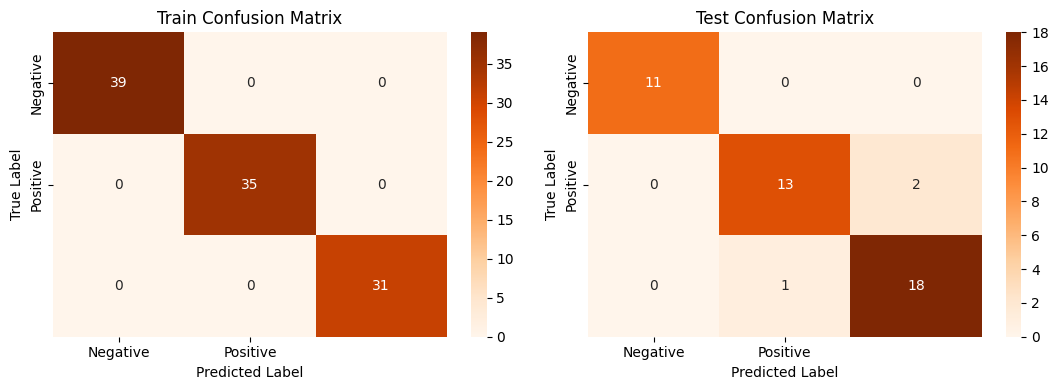


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        39 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        31 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.928571 | 0.866667 |   0.896552 | 15        |
| 2            |    0.9      | 0.947368 |   0.923077 | 19        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [52]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [53]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.990774,0.990774,1.000000
Precision Test,0.955556,0.942424,0.933968
Recall Train,0.990476,0.990476,1.000000
Recall Test,0.955556,0.933333,0.933333
Accuracy Train,0.990476,0.990476,1.000000
Accuracy Test,0.955556,0.933333,0.933333
F1 macro Train,0.990483,0.990483,1.000000
F1 macro Test,0.955556,0.932069,0.933039


In [54]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [55]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


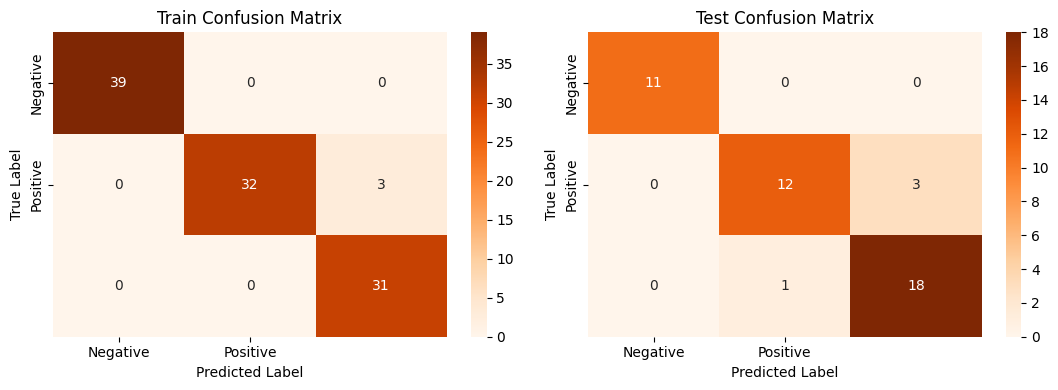


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    1        | 0.914286 |   0.955224 |  35        |
| 2            |    0.911765 | 1        |   0.953846 |  31        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.970588 | 0.971429 |   0.96969  | 105        |
| weighted avg |    0.97395  | 0.971429 |   0.971448 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.923077 | 0.8      |   0.857143 | 15        |
| 2            |    0.857143 | 0.947368 |   0.9      | 19        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [56]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [57]:
score['Decision Tree tuned'] = dt2_score

In [58]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.990774,0.990774,1.000000,0.973950
Precision Test,0.955556,0.942424,0.933968,0.914042
Recall Train,0.990476,0.990476,1.000000,0.971429
Recall Test,0.955556,0.933333,0.933333,0.911111
Accuracy Train,0.990476,0.990476,1.000000,0.971429
Accuracy Test,0.955556,0.933333,0.933333,0.911111
F1 macro Train,0.990483,0.990483,1.000000,0.971448
F1 macro Test,0.955556,0.932069,0.933039,0.910159


In [59]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


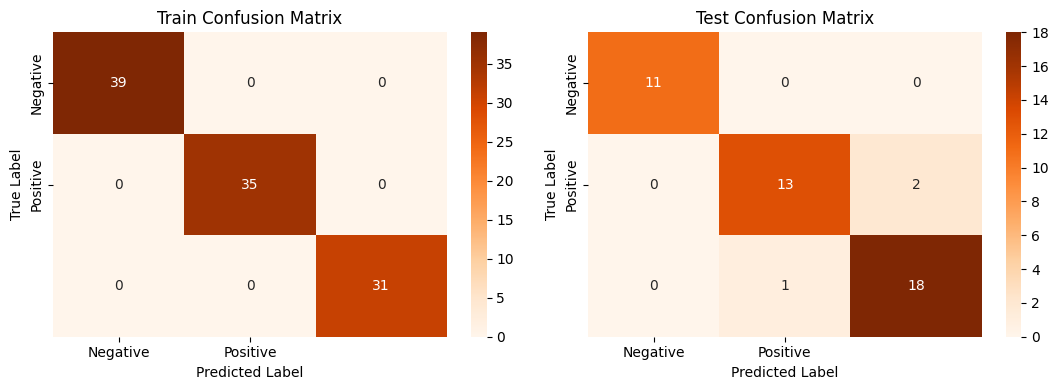


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        39 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        31 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.928571 | 0.866667 |   0.896552 | 15        |
| 2            |    0.9      | 0.947368 |   0.923077 | 19        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [60]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [61]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.990774,0.990774,1.000000,0.973950,1.000000
Precision Test,0.955556,0.942424,0.933968,0.914042,0.933968
Recall Train,0.990476,0.990476,1.000000,0.971429,1.000000
Recall Test,0.955556,0.933333,0.933333,0.911111,0.933333
Accuracy Train,0.990476,0.990476,1.000000,0.971429,1.000000
Accuracy Test,0.955556,0.933333,0.933333,0.911111,0.933333
F1 macro Train,0.990483,0.990483,1.000000,0.971448,1.000000
F1 macro Test,0.955556,0.932069,0.933039,0.910159,0.933039


In [62]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 14}


In [73]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


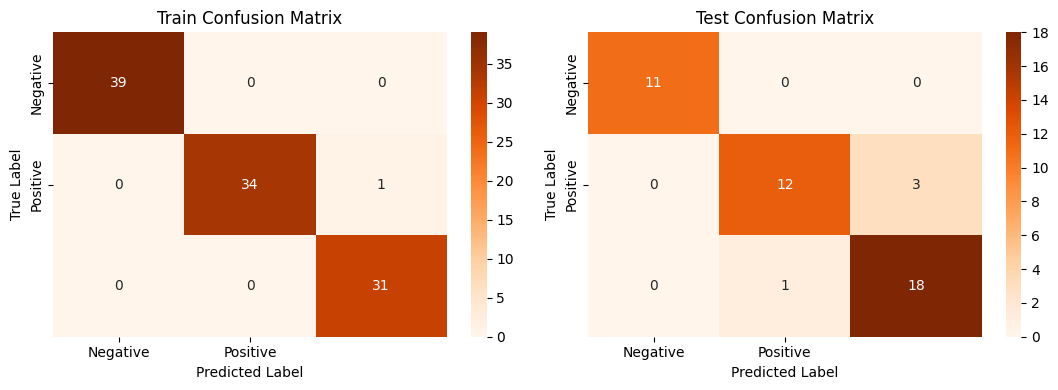


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    1        | 0.971429 |   0.985507 |  35        |
| 2            |    0.96875  | 1        |   0.984127 |  31        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989583 | 0.990476 |   0.989878 | 105        |
| weighted avg |    0.990774 | 0.990476 |   0.990483 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.923077 | 0.8      |   0.857143 | 15        |
| 2            |    0.857143 | 0.947368 |   0.9      | 19        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [74]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [75]:
score['Random Forest tuned'] = rf2_score

In [76]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.990774,0.990774,1.000000,0.973950,1.000000,0.990774,0.990774
Precision Test,0.955556,0.942424,0.933968,0.914042,0.933968,0.914042,0.978889
Recall Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476
Recall Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778
Accuracy Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476
Accuracy Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778
F1 macro Train,0.990483,0.990483,1.000000,0.971448,1.000000,0.990483,0.990483
F1 macro Test,0.955556,0.932069,0.933039,0.910159,0.933039,0.910159,0.977680


In [77]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


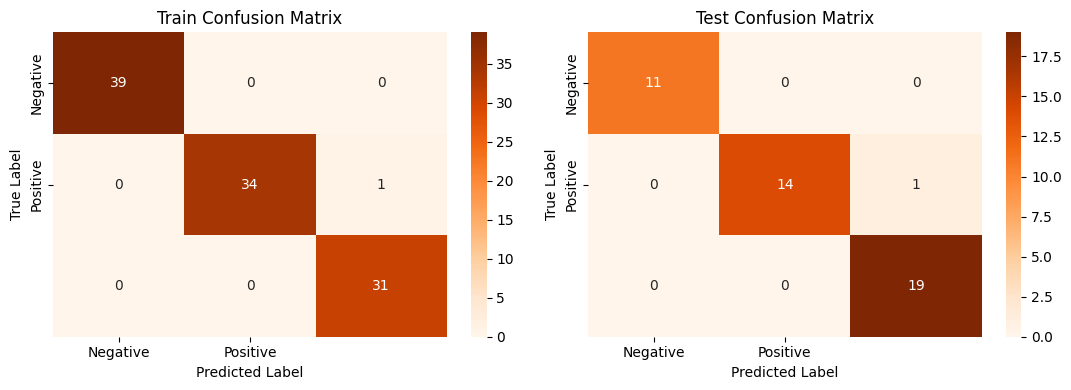


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    1        | 0.971429 |   0.985507 |  35        |
| 2            |    0.96875  | 1        |   0.984127 |  31        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989583 | 0.990476 |   0.989878 | 105        |
| weighted avg |    0.990774 | 0.990476 |   0.990483 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    1        | 0.933333 |   0.965517 | 15        |
| 2            |    0.95     | 1        |   0.974359 | 19        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [78]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [79]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.990774,0.990774,1.000000,0.973950,1.000000,0.990774,0.990774
Precision Test,0.955556,0.942424,0.933968,0.914042,0.933968,0.914042,0.978889
Recall Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476
Recall Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778
Accuracy Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476
Accuracy Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778
F1 macro Train,0.990483,0.990483,1.000000,0.971448,1.000000,0.990483,0.990483
F1 macro Test,0.955556,0.932069,0.933039,0.910159,0.933039,0.910159,0.977680


In [80]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'linear', 'degree': 5, 'C': 6.9}


In [81]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Confusion Matrix:


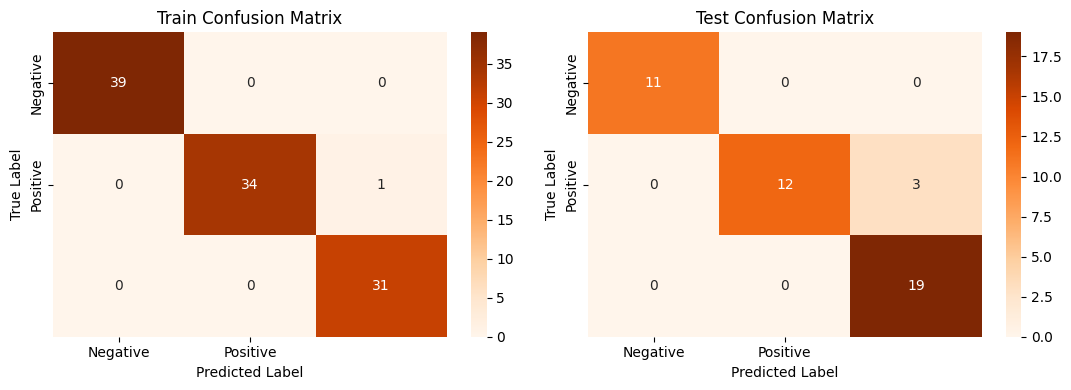


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    1        | 0.971429 |   0.985507 |  35        |
| 2            |    0.96875  | 1        |   0.984127 |  31        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989583 | 0.990476 |   0.989878 | 105        |
| weighted avg |    0.990774 | 0.990476 |   0.990483 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    1        | 0.8      |   0.888889 | 15        |
| 2            |    0.863636 | 1        |   0.926829 | 19        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [82]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

In [83]:
score['SVM tuned'] = svm2_score

In [84]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.990774,0.990774,1.000000,0.973950,1.000000,0.990774,0.990774,0.990774
Precision Test,0.955556,0.942424,0.933968,0.914042,0.933968,0.914042,0.978889,0.942424
Recall Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476,0.990476
Recall Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778,0.933333
Accuracy Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476,0.990476
Accuracy Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778,0.933333
F1 macro Train,0.990483,0.990483,1.000000,0.971448,1.000000,0.990483,0.990483,0.990483
F1 macro Test,0.955556,0.932069,0.933039,0.910159,0.933039,0.910159,0.977680,0.932069


In [85]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier()

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


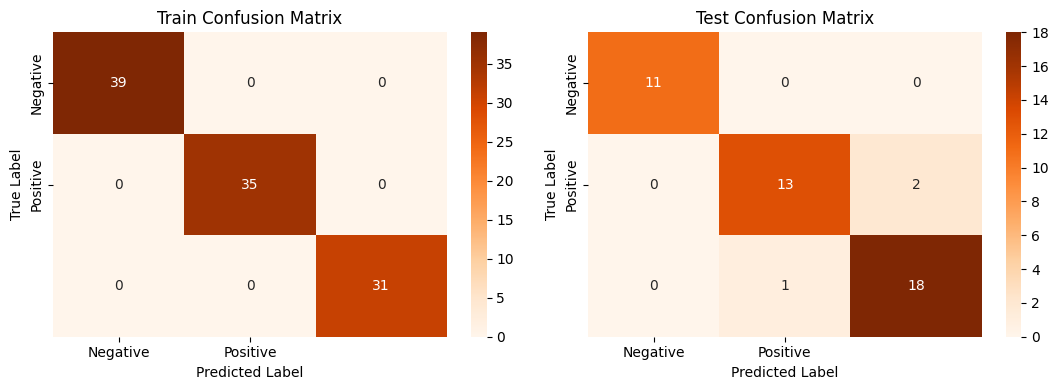


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        39 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        31 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.928571 | 0.866667 |   0.896552 | 15        |
| 2            |    0.9      | 0.947368 |   0.923077 | 19        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [86]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [87]:
# Updated Evaluation metric Score Chart
score['XGB'] = xgb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.990774,0.990774,1.000000,0.973950,1.000000,0.990774,0.990774,0.990774,1.000000
Precision Test,0.955556,0.942424,0.933968,0.914042,0.933968,0.914042,0.978889,0.942424,0.933968
Recall Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476,0.990476,1.000000
Recall Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778,0.933333,0.933333
Accuracy Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476,0.990476,1.000000
Accuracy Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778,0.933333,0.933333
F1 macro Train,0.990483,0.990483,1.000000,0.971448,1.000000,0.990483,0.990483,0.990483,1.000000
F1 macro Test,0.955556,0.932069,0.933039,0.910159,0.933039,0.910159,0.977680,0.932069,0.933039


In [88]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 130, 'max_depth': 9, 'learning_rate': 0.01}


In [89]:
# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Confusion Matrix:


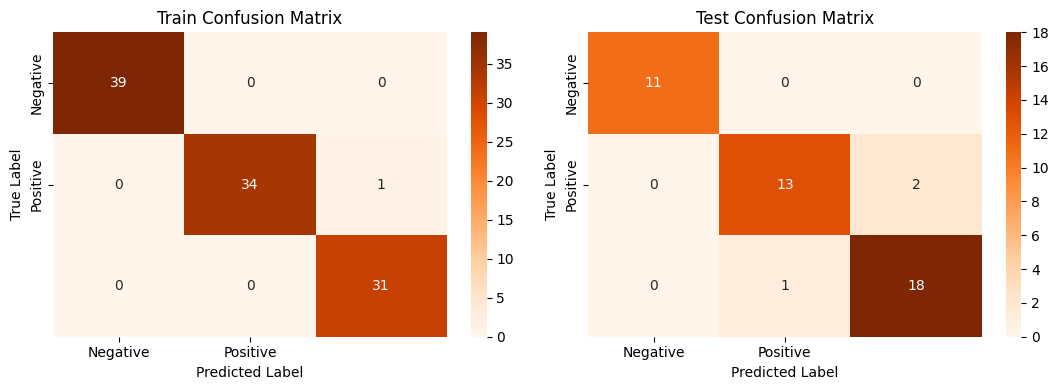


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    1        | 0.971429 |   0.985507 |  35        |
| 2            |    0.96875  | 1        |   0.984127 |  31        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989583 | 0.990476 |   0.989878 | 105        |
| weighted avg |    0.990774 | 0.990476 |   0.990483 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.928571 | 0.866667 |   0.896552 | 15        |
| 2            |    0.9      | 0.947368 |   0.923077 | 19        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [90]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

In [91]:
score['XGB tuned'] = xgb2_score

In [92]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned
Precision Train,0.990774,0.990774,1.000000,0.973950,1.000000,0.990774,0.990774,0.990774,1.000000,0.990774
Precision Test,0.955556,0.942424,0.933968,0.914042,0.933968,0.914042,0.978889,0.942424,0.933968,0.933968
Recall Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476,0.990476,1.000000,0.990476
Recall Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778,0.933333,0.933333,0.933333
Accuracy Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476,0.990476,1.000000,0.990476
Accuracy Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778,0.933333,0.933333,0.933333
F1 macro Train,0.990483,0.990483,1.000000,0.971448,1.000000,0.990483,0.990483,0.990483,1.000000,0.990483
F1 macro Test,0.955556,0.932069,0.933039,0.910159,0.933039,0.910159,0.977680,0.932069,0.933039,0.933039


In [93]:
# ML Model - 6 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


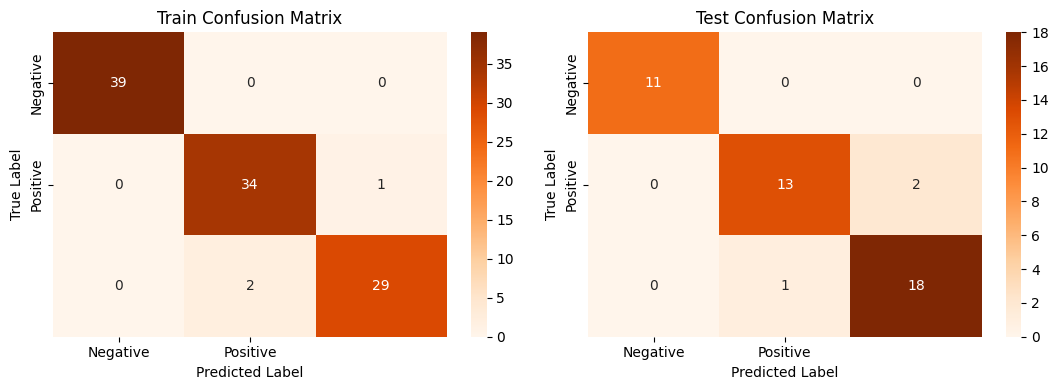


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    0.944444 | 0.971429 |   0.957746 |  35        |
| 2            |    0.966667 | 0.935484 |   0.95082  |  31        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.97037  | 0.968971 |   0.969522 | 105        |
| weighted avg |    0.97164  | 0.971429 |   0.971396 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.928571 | 0.866667 |   0.896552 | 15        |
| 2            |    0.9      | 0.947368 |   0.923077 | 19        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [94]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [95]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes
Precision Train,0.990774,0.990774,1.000000,0.973950,1.000000,0.990774,0.990774,0.990774,1.000000,0.990774,0.971640
Precision Test,0.955556,0.942424,0.933968,0.914042,0.933968,0.914042,0.978889,0.942424,0.933968,0.933968,0.933968
Recall Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476,0.990476,1.000000,0.990476,0.971429
Recall Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778,0.933333,0.933333,0.933333,0.933333
Accuracy Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476,0.990476,1.000000,0.990476,0.971429
Accuracy Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778,0.933333,0.933333,0.933333,0.933333
F1 macro Train,0.990483,0.990483,1.000000,0.971448,1.000000,0.990483,0.990483,0.990483,1.000000,0.990483,0.971396
F1 macro Test,0.955556,0.932069,0.933039,0.910159,0.933039,0.910159,0.977680,0.932069,0.933039,0.933039,0.933039


In [96]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.006579332246575682}


In [97]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


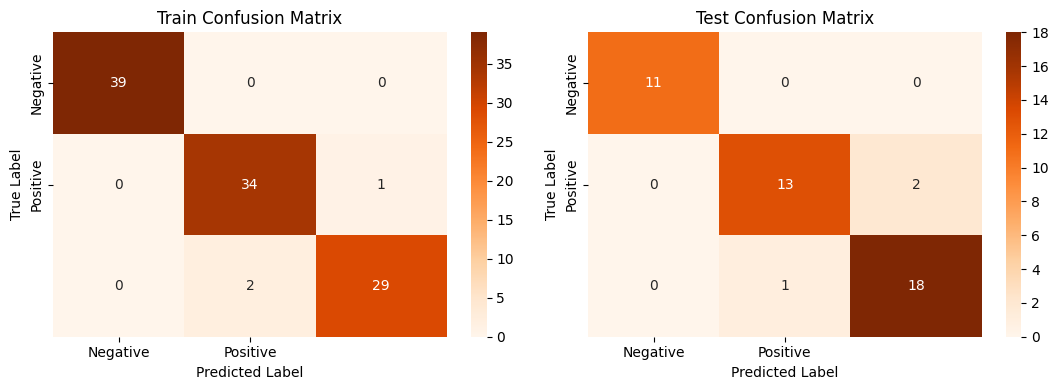


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    0.944444 | 0.971429 |   0.957746 |  35        |
| 2            |    0.966667 | 0.935484 |   0.95082  |  31        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.97037  | 0.968971 |   0.969522 | 105        |
| weighted avg |    0.97164  | 0.971429 |   0.971396 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    0.928571 | 0.866667 |   0.896552 | 15        |
| 2            |    0.9      | 0.947368 |   0.923077 | 19        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [98]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [99]:
score['Naive Bayes tuned']= nb2_score

In [100]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.990774,0.990774,1.000000,0.973950,1.000000,0.990774,0.990774,0.990774,1.000000,0.990774,0.971640,0.971640
Precision Test,0.955556,0.942424,0.933968,0.914042,0.933968,0.914042,0.978889,0.942424,0.933968,0.933968,0.933968,0.933968
Recall Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476,0.990476,1.000000,0.990476,0.971429,0.971429
Recall Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778,0.933333,0.933333,0.933333,0.933333,0.933333
Accuracy Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476,0.990476,1.000000,0.990476,0.971429,0.971429
Accuracy Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778,0.933333,0.933333,0.933333,0.933333,0.933333
F1 macro Train,0.990483,0.990483,1.000000,0.971448,1.000000,0.990483,0.990483,0.990483,1.000000,0.990483,0.971396,0.971396
F1 macro Test,0.955556,0.932069,0.933039,0.910159,0.933039,0.910159,0.977680,0.932069,0.933039,0.933039,0.933039,0.933039


In [101]:
# ML Model - 7 Implementation
nn_model = MLPClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


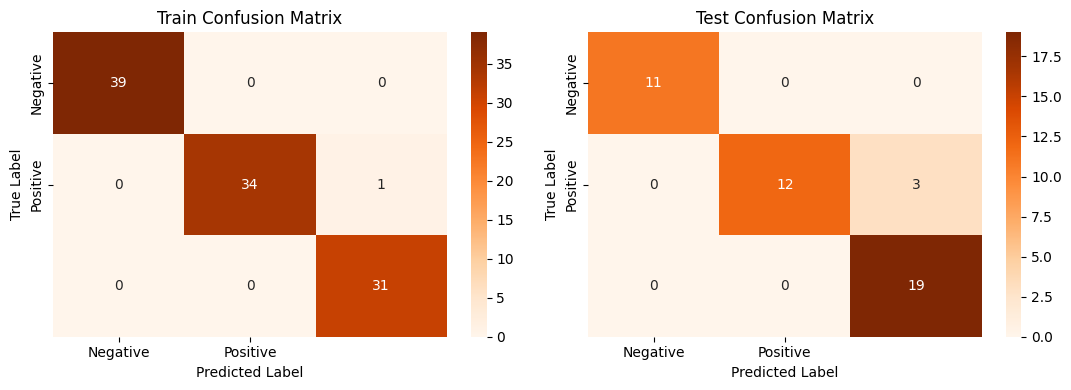


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    1        | 0.971429 |   0.985507 |  35        |
| 2            |    0.96875  | 1        |   0.984127 |  31        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989583 | 0.990476 |   0.989878 | 105        |
| weighted avg |    0.990774 | 0.990476 |   0.990483 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    1        | 0.8      |   0.888889 | 15        |
| 2            |    0.863636 | 1        |   0.926829 | 19        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [102]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [103]:
# Updated Evaluation metric Score Chart
score['Neural Network'] = neural_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.990774,0.990774,1.000000,0.973950,1.000000,0.990774,0.990774,0.990774,1.000000,0.990774,0.971640,0.971640,0.990774
Precision Test,0.955556,0.942424,0.933968,0.914042,0.933968,0.914042,0.978889,0.942424,0.933968,0.933968,0.933968,0.933968,0.942424
Recall Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476,0.990476,1.000000,0.990476,0.971429,0.971429,0.990476
Recall Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
Accuracy Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476,0.990476,1.000000,0.990476,0.971429,0.971429,0.990476
Accuracy Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
F1 macro Train,0.990483,0.990483,1.000000,0.971448,1.000000,0.990483,0.990483,0.990483,1.000000,0.990483,0.971396,0.971396,0.990483
F1 macro Test,0.955556,0.932069,0.933039,0.910159,0.933039,0.910159,0.977680,0.932069,0.933039,0.933039,0.933039,0.933039,0.932069


In [104]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': 70, 'alpha': 0.005300000000000001}


In [105]:
# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Confusion Matrix:


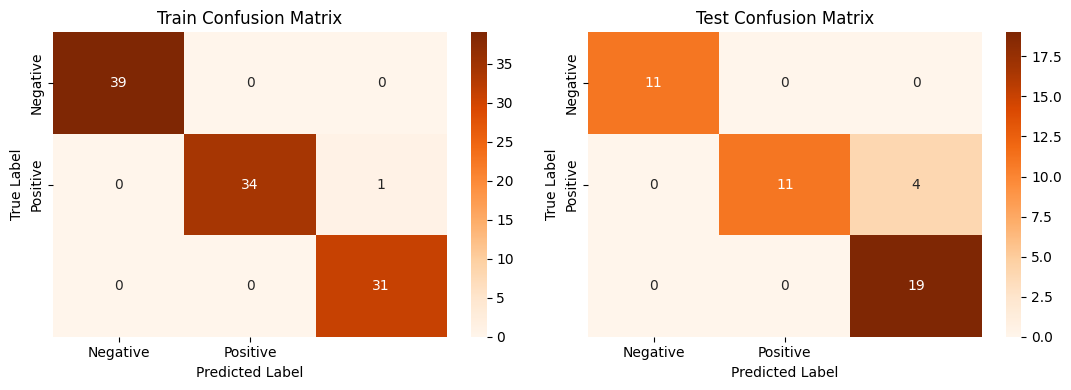


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  39        |
| 1            |    1        | 0.971429 |   0.985507 |  35        |
| 2            |    0.96875  | 1        |   0.984127 |  31        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989583 | 0.990476 |   0.989878 | 105        |
| weighted avg |    0.990774 | 0.990476 |   0.990483 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 11        |
| 1            |    1        | 0.733333 |   0.846154 | 15        |
| 2            |    0.826087 | 1        |   0.904762 | 19        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [106]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [107]:
score['Neural Network tuned']= neural2_score

In [108]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.990774,0.990774,1.000000,0.973950,1.000000,0.990774,0.990774,0.990774,1.000000,0.990774,0.971640,0.971640,0.990774,0.990774
Precision Test,0.955556,0.942424,0.933968,0.914042,0.933968,0.914042,0.978889,0.942424,0.933968,0.933968,0.933968,0.933968,0.942424,0.926570
Recall Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476,0.990476,1.000000,0.990476,0.971429,0.971429,0.990476,0.990476
Recall Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.911111
Accuracy Train,0.990476,0.990476,1.000000,0.971429,1.000000,0.990476,0.990476,0.990476,1.000000,0.990476,0.971429,0.971429,0.990476,0.990476
Accuracy Test,0.955556,0.933333,0.933333,0.911111,0.933333,0.911111,0.977778,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.911111
F1 macro Train,0.990483,0.990483,1.000000,0.971448,1.000000,0.990483,0.990483,0.990483,1.000000,0.990483,0.971396,0.971396,0.990483,0.990483
F1 macro Test,0.955556,0.932069,0.933039,0.910159,0.933039,0.910159,0.977680,0.932069,0.933039,0.933039,0.933039,0.933039,0.932069,0.908506


In [109]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.990774 |                    0.990774 |        1        |              0.97395  |        1        |              0.990774 | 0.990774 |    0.990774 | 1        |    0.990774 |      0.97164  |            0.97164  |         0.990774 |               0.990774 |
| Precision Test  |              0.955556 |                    0.942424 |        0.933968 |              0.914042 |        0.93396

In [110]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Decision Tree tuned,0.97395,0.914042,0.971429,0.911111,0.971429,0.911111,0.971448,0.910159
Naive Bayes,0.97164,0.933968,0.971429,0.933333,0.971429,0.933333,0.971396,0.933039
Naive Bayes tuned,0.97164,0.933968,0.971429,0.933333,0.971429,0.933333,0.971396,0.933039


In [111]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [112]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Naive Bayes - 0.934
Recall: Naive Bayes - 0.9333
Accuracy: Naive Bayes - 0.9333
F1 macro: Naive Bayes - 0.933


In [113]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Decision Tree tuned    |       0.971429 |      0.911111 |
| Naive Bayes            |       0.971429 |      0.933333 |
| Naive Bayes tuned      |       0.971429 |      0.933333 |


In [114]:
# Define a list of category labels for reference.
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [117]:
# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])

# Use the tuned random forest model (rf_model2) to make a prediction.
x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa
